<a href="https://colab.research.google.com/github/PKRaj007/PKRaj007/blob/main/Data_Load_%26_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Learning Objectives**
Ways to fetch image data and
Ways to load image data

**We can fetch data in one of the following ways:**

1-Download from shared google drive link
2-Accessing data from our own google drive
3-If the dataset is loaded on Kaggle, we can access it through Kaggle APIs (ignore this step if you are not familiar with kaggle, you can save it to your bucketlist for later)

**1. Download from shared google drive link**

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='176E-pLhoxTgWsJ3MeoJQV_GXczIA6g8D',
                                    dest_path='/content/drive/MyDrive/Datasets/online dataset.zip',
                                    unzip=True)

Unzipping...

/usr/local/lib/python3.7/dist-packages/google_drive_downloader/google_drive_downloader.py:78: UserWarning: Ignoring `unzip` since "176E-pLhoxTgWsJ3MeoJQV_GXczIA6g8D" does not look like a valid zip file
  warnings.warn('Ignoring `unzip` since "{}" does not look like a valid zip file'.format(file_id))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#copy the data from drive to colab. Copying a saved model from gdrive to colab.
#!mkdir 'models1/'
#!cp '/content/drive/My Drive/PneumoniaClassifier_final_22Mar.pt' '/models1/'

**2. Accessing data from our own google drive**

In [ ]:
#copy the data from drive to colab. Copying a saved model from gdrive to colab.
%cd '/content/dog vs cat'

/content/dog vs cat


In [ ]:
!ls

dataset


In [ ]:
!mkdir --help

Usage: mkdir [OPTION]... DIRECTORY...
Create the DIRECTORY(ies), if they do not already exist.

Mandatory arguments to long options are mandatory for short options too.
  -m, --mode=MODE   set file mode (as in chmod), not a=rwx - umask
  -p, --parents     no error if existing, make parent directories as needed
  -v, --verbose     print a message for each created directory
  -Z                   set SELinux security context of each created directory
                         to the default type
      --context[=CTX]  like -Z, or if CTX is specified then set the SELinux
                         or SMACK security context to CTX
      --help     display this help and exit
      --version  output version information and exit

GNU coreutils online help: <http://www.gnu.org/software/coreutils/>
Full documentation at: <http://www.gnu.org/software/coreutils/mkdir>
or available locally via: info '(coreutils) mkdir invocation'


In [ ]:
cp --help

**3. Access data from kaggle using kaggle API**

In [ ]:
!pip install kaggle
import json
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets list -s 'cats'

ref                                                        title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shaunthesheep/microsoft-catsvsdogs-dataset                 Cats-vs-Dogs                                        788MB  2020-03-12 05:34:30          12008        196  0.875            
chetankv/dogs-cats-images                                  Dogs & Cats Images                                  435MB  2018-04-19 18:20:08          28692        534  0.5625           
mmoreaux/audio-cats-and-dogs                               Audio Cats and Dogs                                  97MB  2017-10-05 09:40:26           8760        223  0.7647059        
biaiscience/dogs-vs-cats                                   Dogs vs Cats              

In [ ]:
!kaggle datasets download -d chetankv/dogs-cats-images -p /content --force

 99% 432M/435M [00:04<00:00, 146MB/s]
100% 435M/435M [00:04<00:00, 104MB/s]


In [ ]:
# extracting the compessed Dataset
#from zipfile import ZipFile
#dataset = '/content/train.csv.zip'

#with ZipFile(dataset,'r') as zip:
 # zip.extractall()
  #print('The dataset is extracted')

In [ ]:
!unzip dogs-cats-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/training_se

: **Loading & Pre-processing image data
Loading and pre-processing an image dataset can be done in one of the following ways **bold text** ** 

1-Without any help from tensorflow/keras (using CV)
Using: tf.keras.preprocessing.2-image_dataset_from_directory
3-Using ImageData generators to load data
**What & Why Data Augmentation**
Pre-processing steps involve Data Augmentation which is nothing but cropping, re-sizing image, flipping an image horizontal/vertically, zooming etc.

Through Data Augmentation, you can create synthentic data i.e different versions of same image (Eg: zoomed picture, horizontally flipped image etc) and train a neural network. This indirectly provides more data to neural networks allowing them to learn and perform better.

Refer this meme: https://www.instagram.com/p/CErANi_HjVb/

**Method 1: Without any help from tensorflow/keras (Using CV)**

In [ ]:
#importing necessary libraries
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
class_names = ['cats','dogs']
IMG_SIZE = 224

In [ ]:
#read the data from a directory
def get_data_from_folder(path):
  data = []
  for class_name in class_names: # iterate through classes
    try:
      files = glob.glob(path+"/"+class_name+"/*") # get files in each folder(class)
      for f in files:
        img = cv2.imread(f) #read the image
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
        data.append([np.array(img),class_names.index(class_name)]) #Append images and corresponding labels to data
    except:
      pass
  np.random.shuffle(data)
  return data

In [ ]:
training_data = get_data_from_folder('dataset/training_set')
testing_data = get_data_from_folder('dataset/testing_set')

**Method 2: Using: tf.keras.preprocessing.image_dataset_from_directory**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size = (224, 224)
batch_size = 32

train_ds = image_dataset_from_directory(
    "dataset/training_set",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =image_dataset_from_directory(
    "dataset/training_set",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.
Found 8000 files belonging to 2 classes.
Using 1600 files for validation.


In [ ]:
test_ds = image_dataset_from_directory(
    "dataset/test_set",
    labels = "inferred",
    label_mode = 'int',
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2000 files belonging to 2 classes.


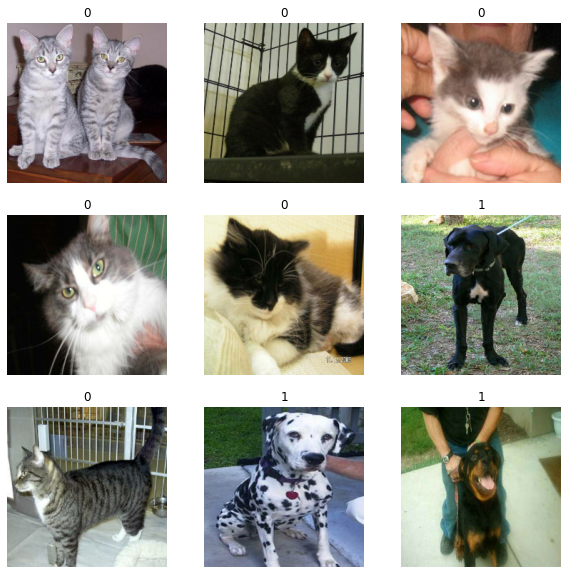

In [ ]:
#visualizing the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


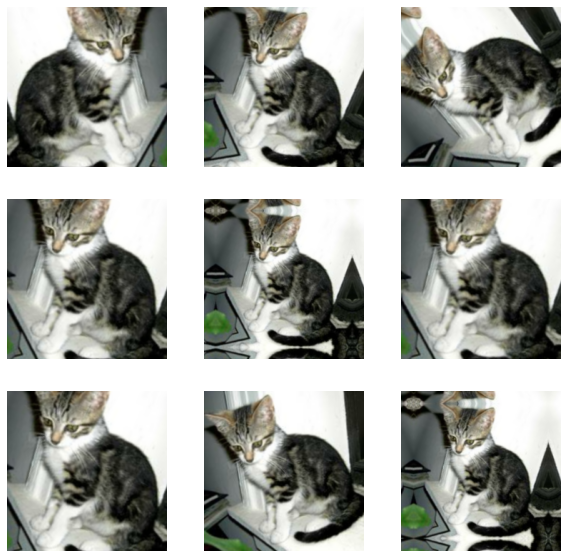

In [ ]:
#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Augment the training dataset**
Method1: Make it part of the model

In [ ]:
# Method 1.1: Functional way of building a model
Input_shape = (224, 224, 3)
inputs = tf.keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(2,activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Method 1.2: This model is same as the above in 1.1
#Sequential way of building models
model = Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(2,activation='softmax'))

NameError: ignored

**Method2: use dataset.map function**

In [ ]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

**Method 3: Using ImageData generators to load data**

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255., # rescaling
                                   rotation_range = 40,  # for augmentation
                                   width_shift_range = 0.2,
                                   validation_split = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.,validation_split = 0.2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory("dataset/training_set/",
                                                    batch_size = 32,
                                                    subset="training",
                                                    class_mode = 'binary', 
                                                    target_size = (224, 224))

test_generator = test_datagen.flow_from_directory("dataset/test_set/",
                                                    batch_size = 32,
                                                    class_mode = 'binary', 
                                                    target_size = (224, 224))

val_generator = val_datagen.flow_from_directory("dataset/training_set/",
                                                subset = "validation",
                                                    batch_size = 32,
                                                    class_mode = 'binary', 
                                                    target_size = (224, 224))


Found 6400 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [ ]:
#create the model and fit the data
history = model.fit(
            train_generator,
            validation_data = test_generator,
            epochs = 10,
            verbose = 2)

NameError: ignored

**Predictions**

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
preds = model.predict(test_generator)
#if using softmax activation on output layer
predicted_labels  = np.argmax(preds,axis=1)

In [ ]:
#Accessing classnames with predicted clases
final_predictions = [class_names[i] for i in predicted_labels]